### **利用gdal开源库进行栅格文件的读写**
#### 1.读入遥感影像。
#### 2.写出遥感影像近红外波段。


In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os

### 读入影像主要函数
gdal.Open():打开遥感影像。  
.RasterXSize, .RasterYSize, .RasterCount: 获取影像x,y方向尺寸，及波段数。
.GetGeoTransform():获取地理转换参数。  
.GetProjection():获取投影信息。  
.GetRasterBand():获取影像波段。  
.ReadAsArray():将波段读入为np.array()。  




In [3]:
os.getcwd()


'/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/Open-Source-GIS-Course'

In [4]:
path_rsimg = 'data/Section-2/s2_chenggong_20200411_6bands_20m.tif'


In [5]:
## 读入栅格数据，包括影像信息和地理信息
dset = gdal.Open(path_rsimg)
geo_trans = dset.GetGeoTransform()   ### 获取地理转换参数：（左上角坐标x, 像元宽度，行旋转参数，左上角坐标y,列旋转参数，像元高度）
print('geo_transform:', geo_trans)
proj = dset.GetProjection()    ### 获取影像投影
print('projection:', proj)
x_size, y_size, num_band = dset.RasterXSize, dset.RasterYSize, dset.RasterCount  ## 获取影像尺寸、波段数信息
print('xsize: %.0f, ysize: %.0f, num_band: %.0f' % (x_size, y_size, num_band))
band = dset.GetRasterBand(4)   ### 获取影像某一个波段
band_array = band.ReadAsArray()     ### 将影像读入为np.array()格式
print('shape of array:', band_array.shape)



geo_transform: (874420.0, 20.0, 0.0, 2769600.0, 0.0, -20.0)
projection: PROJCS["WGS 84 / UTM zone 47N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32647"]]
xsize: 1490, ysize: 1630, num_band: 6
shape of array: (1630, 1490)


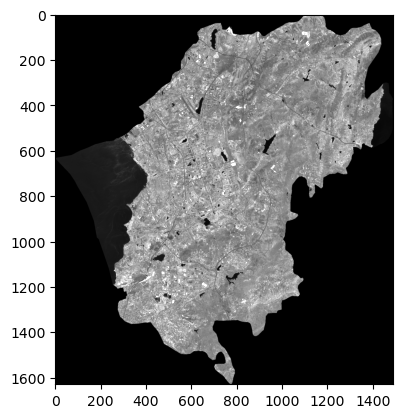

In [6]:
plt.figure()
plt.imshow(band_array, vmax=4000, vmin=0, cmap='gray')


### 写出影像主要函数
gdal.GetDriverByName():创建文件驱动。  
.Create(): 创建影像文件。  
.SetGeoTransform():设置地理转换参数。  
.SetProjection():设置投影。  
.WriteArray(): 将np.array()数组写入波段。  
.SetNoDataValue(): 设置无数据值，数据压缩。  



In [8]:
driver = gdal.GetDriverByName("GTiff")  ## 创建.tif文件驱动
outdset = driver.Create('data/Section-5/s2_chenggon_writeout_nir_band.tif', xsize=band_array.shape[1], \
                                ysize=band_array.shape[0], bands=1, eType=gdal.GDT_Int16)  ### 创建空的.tif数据
outdset.SetGeoTransform(geo_trans)    ### 设置地理转换参数
outdset.SetProjection(proj)           ### 设置投影
outband = outdset.GetRasterBand(1)    ### 获取波段1
outband.WriteArray(band_array)        ### 将np.array()数组写入波段1
outband.SetNoDataValue(np.nan)        ### 设置特定值为无数据，具有压缩功能
outdset = None    ## 关闭.tif文件驱动


### 课堂练习：
1.利用gdal库将遥感影像读取写成函数，函数输入为影像路径，输出为np.array()格式的数组，以及投影、地理转换等重要信息。  
2.利用gdal库将遥感影像写入写成函数，函数输入为np.array()格式的数组，投影及地理转换，输出为写出影像的路径。  
3.利用遥感影像读取函数读入Sentinel-2遥感影像数据，并写出绿光波段。  
